1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

In [2]:
#comulative prob
cprob = np.array([i/(years_nb+1) for i in range(years_nb)])
print('Comulative probability:','\n', cprob, '\n')

#sort the speed
s_speeds=np.sort(max_speeds)
print('Sorted speeds:','\n',s_speeds)

Comulative probability: 
 [0.         0.04545455 0.09090909 0.13636364 0.18181818 0.22727273
 0.27272727 0.31818182 0.36363636 0.40909091 0.45454545 0.5
 0.54545455 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727
 0.81818182 0.86363636 0.90909091] 

Sorted speeds: 
 [22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


In [3]:
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(cprob, s_speeds)
spl.set_smoothing_factor(0.08)

x1=np.linspace(0,np.amax(cprob),100)
x2=np.linspace(0,20,100)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(cprob, s_speeds, 'o')
ax.plot(x1, spl(x1))
ax.set_xlabel('Comulative probability')
ax.set_ylabel('Wind Speed');

In [4]:
fifty_prob = 1. - 0.02
fifty_wind = spl(fifty_prob)

#expected speed
print('The storm wind speed occurring every 50 years is', fifty_wind )

The storm wind speed occurring every 50 years is 50.009033973553215


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

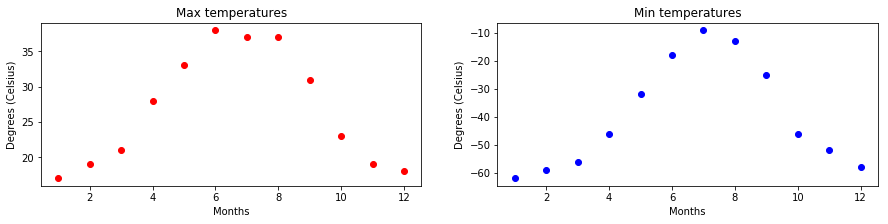

In [5]:
#storing the degrees
max_deg = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_deg = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

ax1.plot(np.arange(1,13), max_deg, 'ro')
ax1.set_title('Max temperatures')
ax1.set_xlabel('Months')
ax1.set_ylabel('Degrees (Celsius)');
ax2.plot(np.arange(1,13), min_deg, 'bo')
ax2.set_title('Min temperatures')
ax2.set_xlabel('Months')
ax2.set_ylabel('Degrees (Celsius)');

In [6]:
#defina a guassian as function that describes min and max temperature
from math import pi
def gauss(x, mu, std,a):
     return a*np.exp(-0.5*(x-mu)**2/(std**2))/np.sqrt(2*pi*std)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


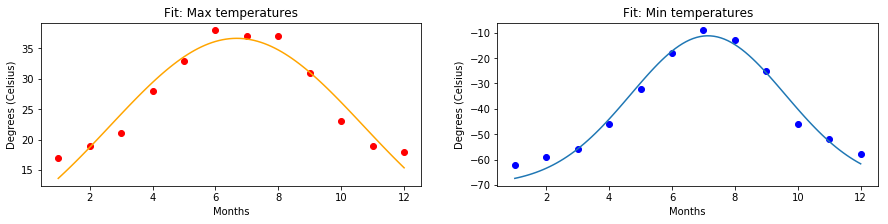

In [7]:
from scipy.optimize import curve_fit
#optimization for max temperature
max_popt, max_pcov = curve_fit(gauss, np.arange(1,13), max_deg)
#print(max_popt)
#optimization for min temperature
min_popt, min_pcov = curve_fit(gauss, np.arange(1,13), min_deg+70)
#print(min_popt)

#plot the results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

x=np.linspace(1,12,100)

ax1.plot(np.arange(1,13), max_deg, 'ro')
ax1.plot(x, gauss(x,max_popt[0],max_popt[1],max_popt[2]), 'orange')
ax1.set_title('Fit: Max temperatures')
ax1.set_xlabel('Months')
ax1.set_ylabel('Degrees (Celsius)');

ax2.plot(np.arange(1,13), min_deg, 'bo')
ax2.plot(x, gauss(x,min_popt[0],min_popt[1],min_popt[2])-70)
ax2.set_title('Fit: Min temperatures')
ax2.set_xlabel('Months')
ax2.set_ylabel('Degrees (Celsius)');

The fit on high temperature is not really reasonable while the one for the low temperature is good. Probably for the high temperature a gaussian fit obtained is not good. The offset time is not the same for min and max temperature within the fit accuracy.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [8]:
#define the function
def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

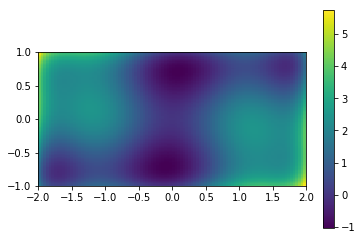

In [9]:
#plot
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

X, Y = np.meshgrid(x,y)
Z = [X,Y]
plt.imshow(f(Z), extent=[-2, 2, -1, 1])
plt.colorbar();

There are 2 global minima in [0.08984195601515084, -0.712656424323363] and [-0.08984196953107884, 0.7126564102525131] The value of the function in these points is -1.0316284534898597 and -1.0316284534898692
Setting the initial guess to (0,0) a minimum in [0,0] is found and the value of the function in the origin is 0


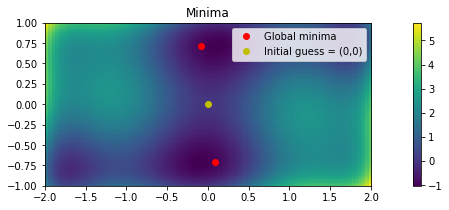

In [10]:
#minima
from scipy.optimize import minimize

#initial guess
guess = [(-2,-1),(-2,0),(-2,1),(-1,-1),(-1,0),(-1,1),(0,-1),(0,0),(0,1),(1,-1),(1,0),(1,1),(2,-1),(2,0),(2,1)]
minima=[]
for i in range(len(guess)):
    minima.append(minimize(f, guess[i]).x)
    #print('Initial guess:', guess[i], '- Minimum:', minima[i], '- f(minimum)=', f(minima[i]))

#there are just two global minima but the values are different so I take the mean
min_p=[0,0]
min_n=[0,0]
for i in minima:
    if i[0]>0: 
        min_p[0] += i[0]/7
        min_p[1] += i[1]/7
    else: 
        min_n[0] += i[0]/7
        min_n[1] += i[1]/7


#plot
fig, ax = plt.subplots(figsize=(15, 3))

mesh = ax.imshow(f(Z), extent=[-2, 2, -1, 1])
fig.colorbar(mesh,ax=ax)
ax.plot(min_p[0],min_p[1], 'ro', label='Global minima')
ax.plot(min_n[0],min_n[1], 'ro')
ax.plot(0,0, 'yo', label='Initial guess = (0,0)')
ax.legend()
ax.set_title('Minima')

print('There are 2 global minima in', min_p, 'and', min_n, 'The value of the function in these points is', f(min_p), 'and', f(min_n))
print('Setting the initial guess to (0,0) a solution in [0,0] is found and the value of the function in the origin is 0')

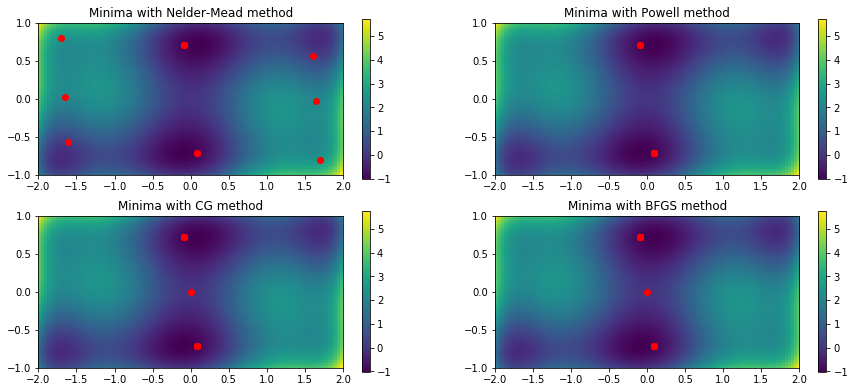

In [11]:
#repeat the procedure with a different methods
#initial guess
guess = [(-2,-1),(-2,0),(-2,1),(-1,-1),(-1,0),(-1,1),(0,-1),(0,0),(0,1),(1,-1),(1,0),(1,1),(2,-1),(2,0),(2,1)]
minima_NM=[]
minima_P=[]
minima_CG=[]
minima_BFGS=[]
for i in range(len(guess)):
    minima_NM.append(minimize(f, guess[i], method='Nelder-Mead').x)
    minima_P.append(minimize(f, guess[i], method='Powell').x)
    minima_CG.append(minimize(f, guess[i], method='CG').x)
    minima_BFGS.append(minimize(f, guess[i], method='BFGS').x)
    #print('Initial guess:', guess[i], '- Minimum:', minima_NM[i], '- f(minimum)=', f(minima_NM[i]))
       
#plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 6.5))

for i in minima_NM:
    ax1.plot(i[0],i[1], 'ro', label='Output')
for i in minima_P:
    ax2.plot(i[0],i[1], 'ro', label='Output')
for i in minima_CG:
    ax3.plot(i[0],i[1], 'ro', label='Output')
for i in minima_BFGS:
    ax4.plot(i[0],i[1], 'ro', label='Output')
    
mesh1 = ax1.imshow(f(Z), extent=[-2, 2, -1, 1])
mesh2 = ax2.imshow(f(Z), extent=[-2, 2, -1, 1])
mesh3 = ax3.imshow(f(Z), extent=[-2, 2, -1, 1])
mesh4 = ax4.imshow(f(Z), extent=[-2, 2, -1, 1])


fig.colorbar(mesh1,ax=ax1)
fig.colorbar(mesh2,ax=ax2)
fig.colorbar(mesh3,ax=ax3)
fig.colorbar(mesh4,ax=ax4)


ax1.set_title('Minima with Nelder-Mead method')
ax2.set_title('Minima with Powell method')
ax3.set_title('Minima with CG method')
ax4.set_title('Minima with BFGS method');

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

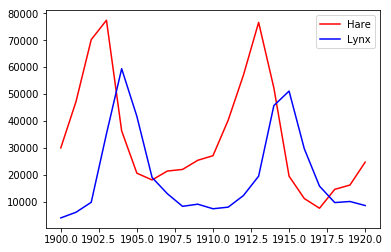

In [12]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

#plot 
plt.plot(year, hares, 'r', year, lynxes, 'blue') 
plt.legend(('Hare', 'Lynx')); 

The frequency peak in Lynxes is 0.09523809523809523
The frequency peak in Hares is 0.09523809523809523


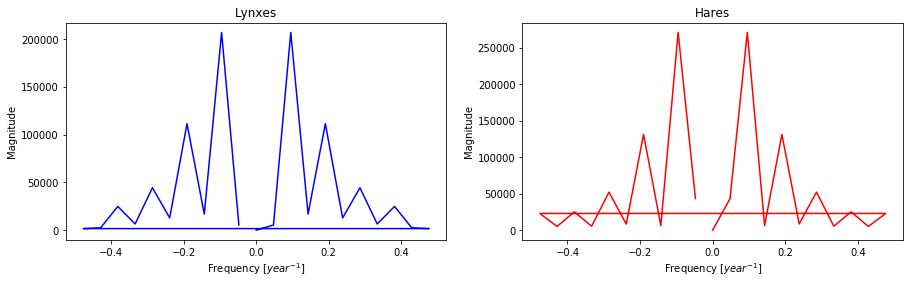

In [13]:
from scipy import fftpack

#fft of the signal
#lynxes
l_fft = fftpack.fft(lynxes-np.mean(lynxes))
l_mag = np.abs(l_fft)
l_pha = np.angle(l_fft)
#sampling frequencies
l_freq = fftpack.fftfreq(21, d=1)

#hares
h_fft = fftpack.fft(hares-np.mean(hares))
h_mag = np.abs(h_fft)
h_pha = np.angle(h_fft)
#sampling frequencies
h_freq = fftpack.fftfreq(21, d=1)

#plot
fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

ax1.plot(l_freq, l_mag, 'blue')
ax1.set_xlabel('Frequency [$year^{-1}$]')
ax1.set_ylabel('Magnitude')
ax1.set_title('Lynxes')
ax2.plot(h_freq, h_mag, 'r')
ax2.set_xlabel('Frequency [$year^{-1}$]')
ax2.set_ylabel('Magnitude')
ax2.set_title('Hares')

#looking for the peaks
peak_l=l_freq[l_mag.argmax()]
print('The frequency peak in Lynxes is',peak_l)
peak_h=h_freq[h_mag.argmax()]
print('The frequency peak in Hares is',peak_h)

As expected the peak is the same for the two dataset, it is now possible to find the period of the data.
The peak in frequency is the inverse of the period: $$\nu_{peak} = \frac{1}{T}$$

In [14]:
T=1/peak_l
print('The period is', T, 'years')

The period is 10.5 years


5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

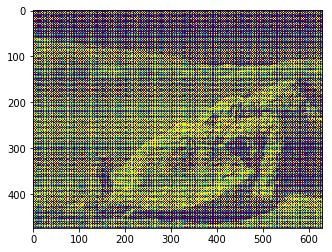

In [15]:
image = plt.imread('moonlanding.png')

fig, ax = plt.subplots()
ax.imshow(image);

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


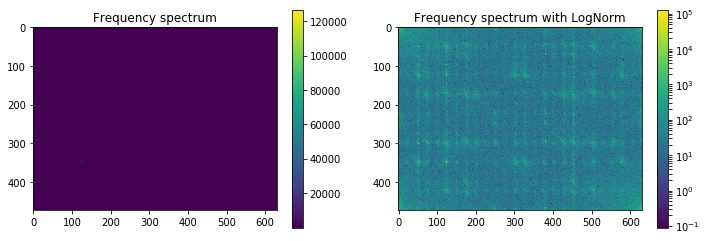

In [16]:
#fft of the signal
im_fft = fftpack.fft2(image)
im_real = np.abs(im_fft)

#spectrum plot
from matplotlib import colors
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
spec1=ax1.imshow(im_real)
ax1.set_title('Frequency spectrum')
fig.colorbar(spec1,ax=ax1);
spec2=ax2.imshow(im_real, norm=colors.LogNorm())
ax2.set_title('Frequency spectrum with LogNorm')
fig.colorbar(spec2,ax=ax2);

In the graph on the left the spectrum is not visible to the low interval of frequency allowed. On the right the visible spectrum with Logaritmic frequency interval of the frequency.

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


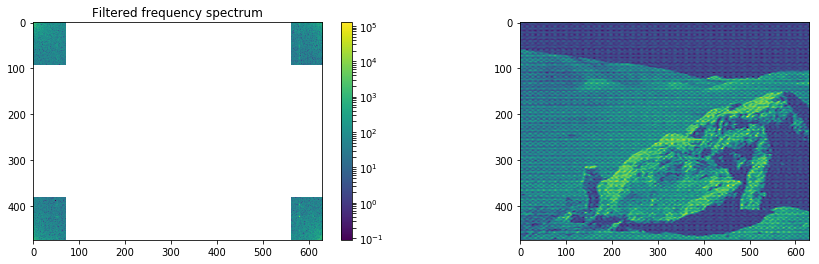

In [18]:
#filtering the image
fil_fft=im_fft.copy()

col, row = fil_fft.shape
q=0.15

fil_fft[int(row*q):int((1-row)*q),:]=0
fil_fft[:,int(col*q):int((1-col)*q)]=0


fil_real= np.abs(fil_fft)
filtered = np.abs(fftpack.ifft2(fil_fft))

#spectrum plot
from matplotlib import colors
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
spec=ax1.imshow(fil_real, norm=colors.LogNorm())
ax1.set_title('Filtered frequency spectrum')
fig.colorbar(spec,ax=ax1)
ax2.imshow(filtered);